# Multi-class image classification
Simple example to classify images using tensorflow

## Import Data

In [ ]:
# Unzip it
import zipfile

zip_ref = zipfile.ZipFile("Shots.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
# Import helper functions
def split_dir_to_train_test_val(directory = "data/",
                            train_size = 0.7,
                            test_size = 0.2,
                            val_size = 0.1):
  """
  Creates 3 folders for Train, Test and Validation data
  """
  import os
  import random
  import shutil

  # Set random seed
  rng = random.Random(42)

  for root, folders, files in os.walk(directory):
    for folder in folders:
      # Create list of the files
      list_of_files = []
      for file_name in os.listdir(root+folder+"/"):
        list_of_files.append(file_name)

      #  Shuffle the list
      rng.shuffle(list_of_files)

      # Create lists of files
      train_files = list_of_files[:int(len(list_of_files)*train_size)]
      test_files = list_of_files[int(len(list_of_files)*train_size) : int(len(list_of_files)*(train_size+test_size))]
      val_files = list_of_files[int(len(list_of_files)*(train_size+test_size)):]

      # Create folders and files for train data
      for one_file in train_files:

        # Copy  files
        dest_dir = "files/train/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Train data copied. {len(train_files)} files")

      # Create folders and files for test data
      for one_file in test_files:
        # Copy  files
        dest_dir = "files/test/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Test data copied. {len(test_files)} files")

      # Create folders and files for validation data
      for one_file in val_files:

        # Copy  files
        dest_dir = "files/validation/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Validation data copied. {len(val_files)} files")




def get_class_names_from_folder(directory):
  """
  Get the classnames from train folder for example
  """
  import pathlib
  import numpy as np
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names
  return class_names
  print(class_names)

In [ ]:
# Split images dir to train, test and validation
split_dir_to_train_test_val(directory="data/",
                            train_size=0.7,
                            test_size=0.2,
                            val_size=0.1)

Folder drive. Train data copied. 863 files
Folder drive. Test data copied. 246 files
Folder drive. Validation data copied. 124 files
Folder pullshot. Train data copied. 882 files
Folder pullshot. Test data copied. 252 files
Folder pullshot. Validation data copied. 126 files
Folder legglance-flick. Train data copied. 784 files
Folder legglance-flick. Test data copied. 223 files
Folder legglance-flick. Validation data copied. 113 files
Folder sweep. Train data copied. 784 files
Folder sweep. Test data copied. 223 files
Folder sweep. Validation data copied. 113 files


## Explore and visualize the data

In [ ]:
# Using helper function get class names
class_names = get_class_names_from_folder(directory="files/train/")
class_names

array(['drive', 'legglance-flick', 'pullshot', 'sweep'], dtype='<U15')

In [ ]:
len(class_names)

4

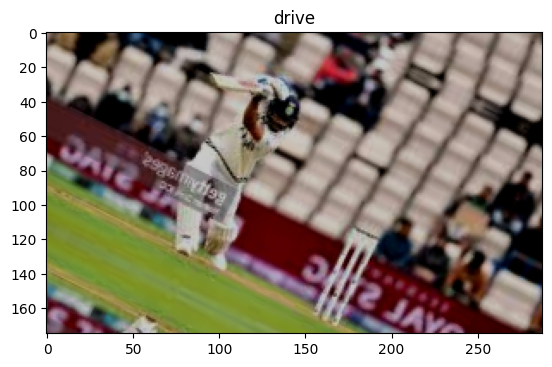

In [ ]:
# Let's visualize some images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import random

def visualize_random_image(target_dir, target_class):
  """
  Visualises random image from exact directory
  """
  image_dir = target_dir + target_class
  random_image = random.sample(os.listdir(image_dir), 1)

  img = mpimg.imread(image_dir + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)

visualize_random_image("files/test/", "drive")

## Create datasets from directories

In [ ]:
# Import library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory="files/train",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(directory="files/test",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

validation_data = val_datagen.flow_from_directory(directory="files/validation",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

Found 3312 images belonging to 4 classes.
Found 944 images belonging to 4 classes.
Found 476 images belonging to 4 classes.


## Create and fit the model

In [ ]:
# Set random seed
tf.random.set_seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Create model
model = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(240, 240, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(4, activation="softmax")
])

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Stop training if no improvement after 3 epochs
    verbose=1            # Display messages when stopping
)

In [ ]:
# Fit the model
history = model.fit(train_data,
                    batch_size=32,
                    epochs=30,
                    steps_per_epoch=len(train_data),
                    validation_data=validation_data,
                    callbacks=[early_stopping],
                    validation_steps=len(validation_data))

Epoch 1/30
104/104 [==============================] - 79s 762ms/step - loss: 0.9808 - accuracy: 0.6208 - val_loss: 0.7074 - val_accuracy: 0.7332
Epoch 2/30
104/104 [==============================] - 78s 752ms/step - loss: 0.4962 - accuracy: 0.8261 - val_loss: 0.5278 - val_accuracy: 0.8067
Epoch 3/30
104/104 [==============================] - 78s 748ms/step - loss: 0.2577 - accuracy: 0.9203 - val_loss: 0.4159 - val_accuracy: 0.8466
Epoch 4/30
104/104 [==============================] - 78s 751ms/step - loss: 0.1344 - accuracy: 0.9665 - val_loss: 0.4193 - val_accuracy: 0.8361
Epoch 5/30
104/104 [==============================] - 78s 749ms/step - loss: 0.0636 - accuracy: 0.9912 - val_loss: 0.4137 - val_accuracy: 0.8487
Epoch 6/30
104/104 [==============================] - 78s 753ms/step - loss: 0.0300 - accuracy: 0.9976 - val_loss: 0.4552 - val_accuracy: 0.8466
Epoch 7/30
104/104 [==============================] - 78s 747ms/step - loss: 0.0147 - accuracy: 0.9994 - val_loss: 0.5373 - val_ac

## Evaluate model

In [ ]:
model.evaluate(test_data)

30/30 [==============================] - 9s 301ms/step - loss: 0.4420 - accuracy: 0.8708


[0.44200924038887024, 0.8707627058029175]

<Axes: >

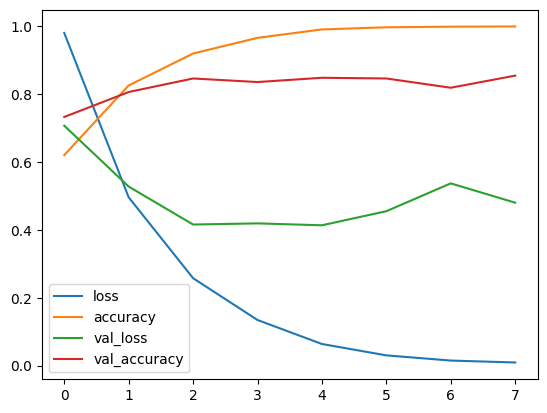

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot()

## Make a prediction

In [ ]:

def load_and_resize_image(filename, size):

  # Load image
  img = tf.io.read_file(filename)

  # Compile image
  img = tf.image.decode_image(img)

  # Resize image
  img = tf.image.resize(img, [size, size])

  # Scale the tensor
  img = img / 255

  return img

image = load_and_resize_image("/content/Virat-Kohli-cover-drive-against-spinners.jpg", 240)


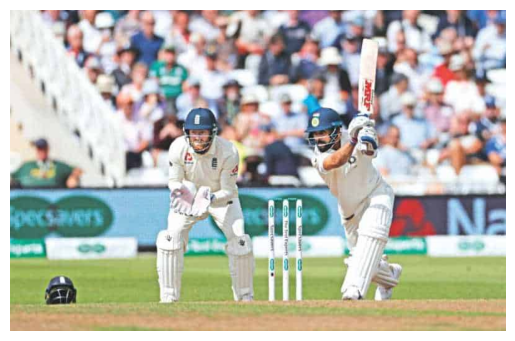

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def visualize_image(image_path):
  """Visualizes an image using matplotlib."""
  try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()
  except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}")
  except Exception as e:
    print(f"An error occurred: {e}")

visualize_image("/content/Virat-Kohli-cover-drive-against-spinners.jpg")

In [ ]:
pred = model.predict(tf.expand_dims(image, axis=0))
pred

1/1 [==============================] - 0s 27ms/step


array([[4.8953743e-06, 9.9963748e-01, 3.5750779e-04, 1.1274581e-07]],
      dtype=float32)

In [ ]:
class_names[pred[0].argmax()]

'legglance-flick'